In [1]:
from IPython.display import display, Image

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
# 데이터 df_x, target을 df_y에 나누어 저장하기
df_x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=["target"])

In [4]:
# df_y를 붙여서 하나의 데이터 프레임으로 보기
df = pd.concat([df_x, df_y], axis=1)
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


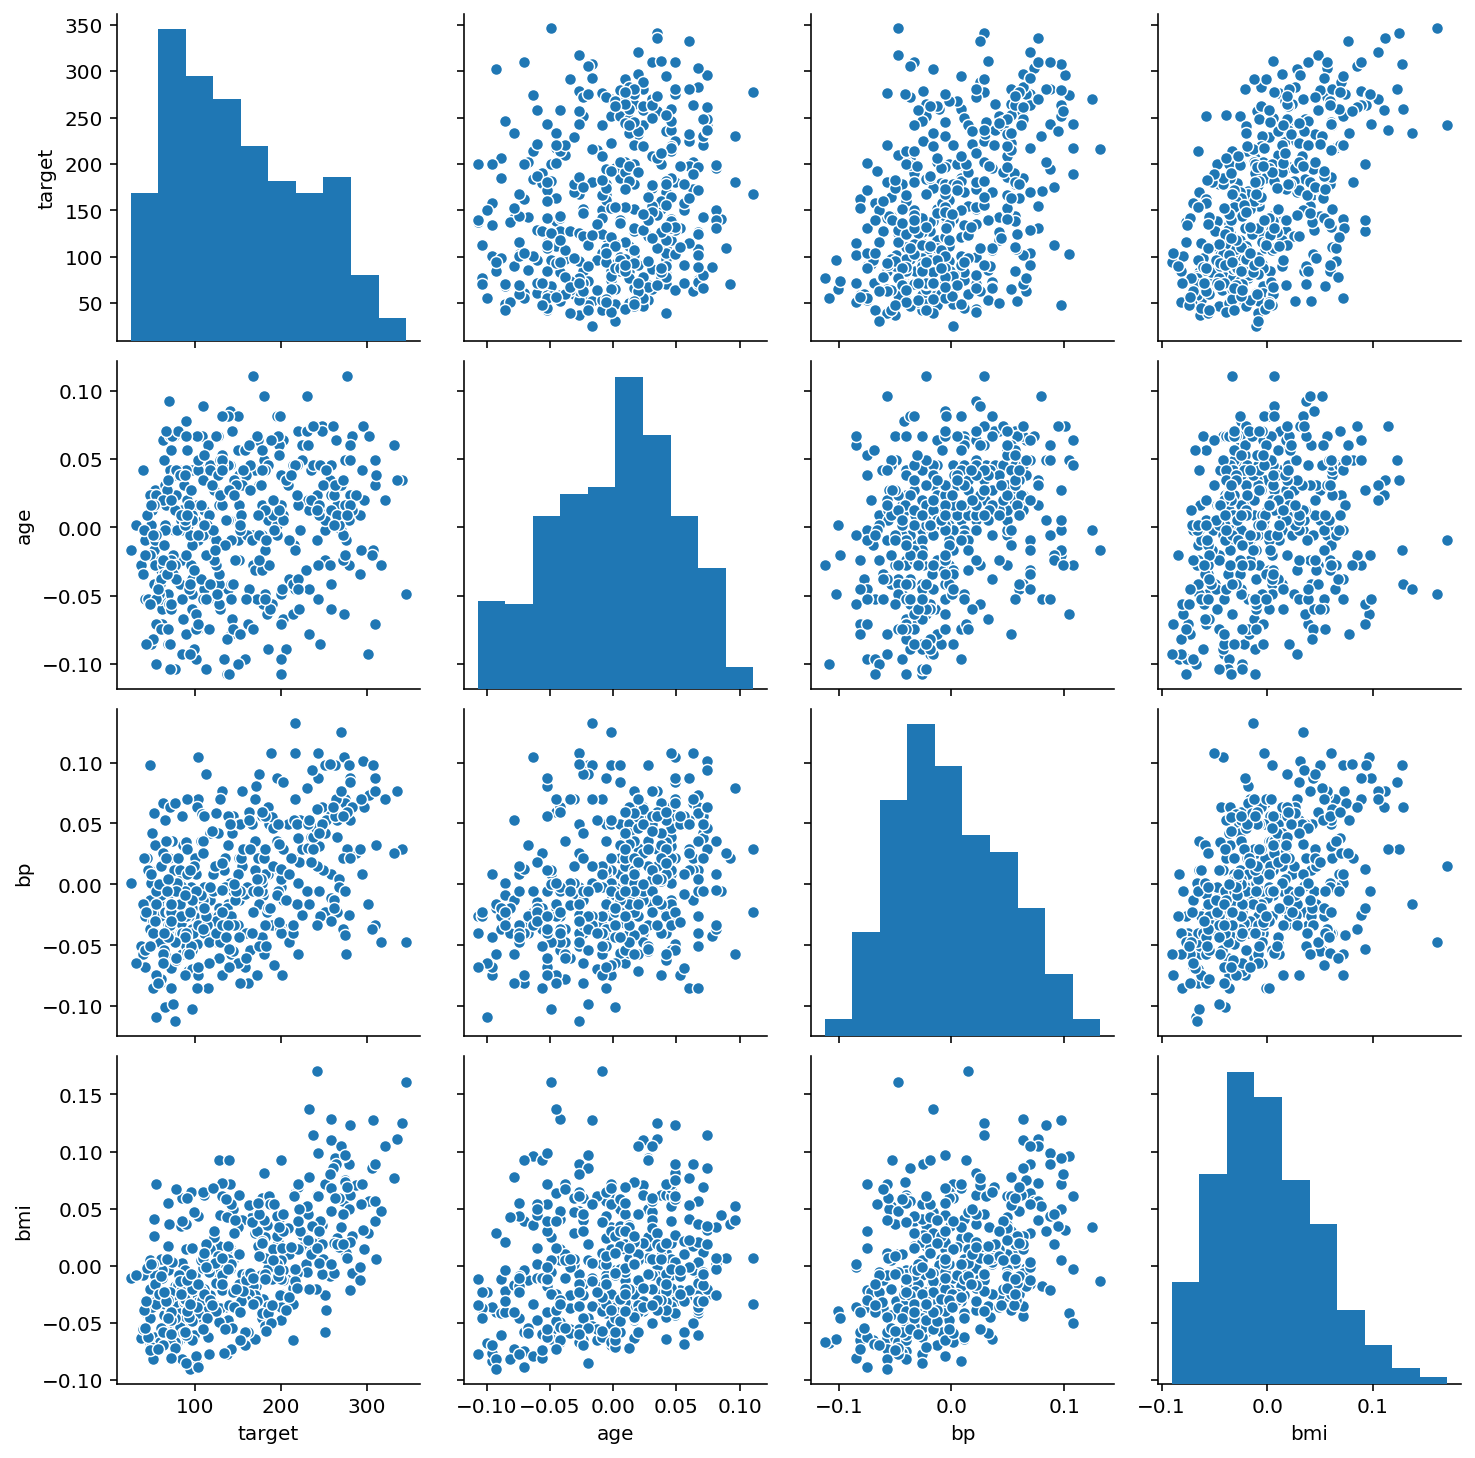

In [5]:
# 변수 각각의 관계를 plotting 해보자
sns.pairplot(df[["target", "age", "bp", "bmi"]])
plt.show()

In [6]:
#df_x와 df_y의 값들을 numpy array로 변환
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
y = df['target'].values

In [7]:
#train_set 과 test_set으로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [8]:
# w와 b 설정
W = np.random.rand(10)
b = np.random.rand()

# 모델 함수를 구현
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*W[i]
    predictions += b
    return predictions

In [9]:
model(X_test, W, b)

array([ 0.27110548,  0.04908856,  0.32706545,  0.46140818,  0.18874709,
        0.14038064,  0.26252775,  0.37429964, -0.03902085,  0.0750831 ,
       -0.03662574, -0.11961287, -0.32255696,  0.32548469,  0.05416669,
       -0.0446423 ,  0.36591079,  0.39768359, -0.07490641,  0.29523299,
       -0.03805877,  0.02911495, -0.11721865,  0.26614022, -0.0949822 ,
        0.1363139 ,  0.12815878,  0.13008207, -0.23829083,  0.17954234,
        0.06533162, -0.15625293,  0.09526601,  0.21008513,  0.22274161,
        0.19604672,  0.10131652,  0.18649139,  0.32441751, -0.13017692,
       -0.02768363,  0.1463153 ,  0.03774846,  0.30700021,  0.17881777,
       -0.11213812, -0.23780032, -0.07634236, -0.20004728, -0.08147562,
       -0.18126253, -0.26560246,  0.05920334, -0.02259773,  0.28588094,
       -0.14028962,  0.01214755,  0.11730501, -0.10601215, -0.17976846,
        0.19737524, -0.04547849, -0.0705901 ,  0.1502837 , -0.02707275,
        0.20201351,  0.2339843 ,  0.16550992, -0.2959799 ,  0.01

In [10]:
#loss 구현
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

#MSE 구현
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [11]:
#gradient 구현
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.38342749  -13.58995489 -189.50297596 -142.50270515  -68.10113324
  -55.83420058  127.51316873 -138.79330945 -182.66301942 -123.31328032]
db: -304.12573958408484


In [16]:
#learning rate 설정 및 모델 학습
LEARNING_RATE = 0.001

losses = []

for i in range(1, 1000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6568.7226
Iteration 20 : Loss 6476.6366
Iteration 30 : Loss 6387.8206
Iteration 40 : Loss 6302.1491
Iteration 50 : Loss 6219.5014
Iteration 60 : Loss 6139.7617
Iteration 70 : Loss 6062.8185
Iteration 80 : Loss 5988.5649
Iteration 90 : Loss 5916.8980
Iteration 100 : Loss 5847.7189
Iteration 110 : Loss 5780.9327
Iteration 120 : Loss 5716.4482
Iteration 130 : Loss 5654.1776
Iteration 140 : Loss 5594.0367
Iteration 150 : Loss 5535.9445
Iteration 160 : Loss 5479.8231
Iteration 170 : Loss 5425.5978
Iteration 180 : Loss 5373.1967
Iteration 190 : Loss 5322.5507
Iteration 200 : Loss 5273.5935
Iteration 210 : Loss 5226.2612
Iteration 220 : Loss 5180.4925
Iteration 230 : Loss 5136.2285
Iteration 240 : Loss 5093.4126
Iteration 250 : Loss 5051.9904
Iteration 260 : Loss 5011.9095
Iteration 270 : Loss 4973.1196
Iteration 280 : Loss 4935.5725
Iteration 290 : Loss 4899.2217
Iteration 300 : Loss 4864.0225
Iteration 310 : Loss 4829.9321
Iteration 320 : Loss 4796.9091
Iteration 330 : L

In [17]:
#test 성능 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3395.732828790468

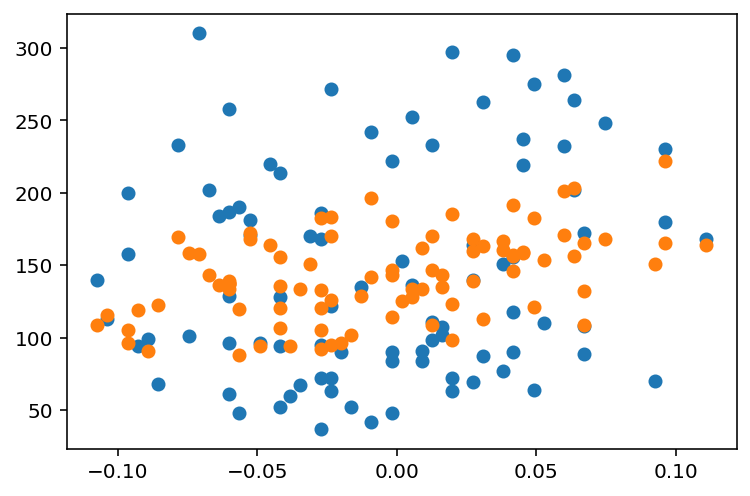

In [18]:
#정답과 예측 시각화 하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()